[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.1.0 Datenaufbereitung

### Electricity Map
Die im folgenden verwendeten Daten für Österreich (2015-2017, 2018-2019) stammen von
[electricitymap.org](https://www.electricitymap.org/map). Basis für die dort verwendeten globalen mittleren
CO2-Intensitäten ist folgender [IPCC Bericht aus dem Jahr 2014](https://en.wikipedia.org/wiki/Life-cycle_greenhouse-gas_emissions_of_energy_sources#2014_IPCC.2C_Global_warming_potential_of_selected_electricity_sources).

In [18]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:



from FLUCCOplus.notebooks import *
import FLUCCOplus.electricitymap as elmap

Es stehen zwei Datensätze zur Verfügung:
* 2015 - 2017 *Electricity_map_CO2_AT_2015_2017.csv*
* 2018 - 2019 *Electricity_map_CO2_AT_2018_2019.csv*

### Electricity Map 2018-19

### Combine 2015-17 with 18-19
Electricity map dataframe (common cols)

In [20]:
em18 = (elmap.read_raw("Electricity_map_CO2_AT_2018_2019.csv")
      .pipe(elmap.start_pipeline)
      .drop(elmap.header_junk, axis=1)
      .astype(float)
      # .fillna(0)
      .pipe(elmap.fill_values)
      )
em18set = set(em18.columns)


<AxesSubplot:xlabel='datetime'>

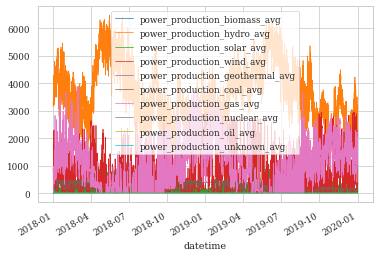

In [21]:
em18 = elmap.read_raw("Electricity_map_CO2_AT_2018_2019.csv")
em18[elmap.pps].plot()

In [22]:
em15 = (elmap.read_raw("Electricity_map_CO2_AT_2015_2017.csv")
        .pipe(elmap.start_pipeline)
        .pipe(elmap.clean151617)
       )
em15set = set(em15.columns)


In [23]:
### Shared columns

In [24]:
em15 = (elmap.read_raw("Electricity_map_CO2_AT_2015_2017.csv")
        .pipe(elmap.start_pipeline)
        .pipe(elmap.clean151617)
       )
em15set = set(em15.columns)



### Shared columns

In [25]:
common_cols = list(em15set & em18set)
common_cols


['total_import_avg',
 'carbon_intensity_avg',
 'total_production_avg',
 'total_export_avg',
 'total_consumption_avg']

### Columns only in 15-17:
*"power_origin_precent_XXX_avg"*


In [26]:
em15unique = sorted([c for c in em15set if c not in em18set])
em18unique = sorted([c for c in em18set if c not in em15set])

em15[em15unique].sum(axis=0)

power_origin_percent_biomass_avg            150231.507662
power_origin_percent_coal_avg               402767.068322
power_origin_percent_gas_avg                299163.063338
power_origin_percent_geothermal_avg            100.328734
power_origin_percent_hydro_avg              993823.673782
power_origin_percent_hydro_discharge_avg    123104.705328
power_origin_percent_nuclear_avg            190279.232509
power_origin_percent_oil_avg                  2361.133593
power_origin_percent_solar_avg               71979.536294
power_origin_percent_unknown_avg            122847.285665
power_origin_percent_wind_avg               273742.464771
dtype: float64

In [27]:
em18unique

['carbon_intensity_discharge_avg',
 'carbon_intensity_import_avg',
 'carbon_intensity_production_avg',
 'carbon_origin_percent_battery_discharge_avg',
 'carbon_origin_percent_biomass_avg',
 'carbon_origin_percent_coal_avg',
 'carbon_origin_percent_gas_avg',
 'carbon_origin_percent_geothermal_avg',
 'carbon_origin_percent_hydro_avg',
 'carbon_origin_percent_hydro_discharge_avg',
 'carbon_origin_percent_nuclear_avg',
 'carbon_origin_percent_oil_avg',
 'carbon_origin_percent_solar_avg',
 'carbon_origin_percent_unknown_avg',
 'carbon_origin_percent_wind_avg',
 'carbon_rate_avg',
 'latest_forecasted_consumption_avg',
 'latest_forecasted_dewpoint_avg',
 'latest_forecasted_power_net_import_CH_avg',
 'latest_forecasted_power_net_import_CZ_avg',
 'latest_forecasted_power_net_import_DE_avg',
 'latest_forecasted_power_net_import_HU_avg',
 'latest_forecasted_power_net_import_IT-NO_avg',
 'latest_forecasted_power_net_import_SI_avg',
 'latest_forecasted_precipitation_avg',
 'latest_forecasted_price_

Diese *origin percents* müssen sich aufgrund von Anteilen Kohle, Nuklear, etc.
also **power_consumptions** sein und nicht *power_productions*

Damit erhalten wir für diese Zeitreihen power_consumptions für alle Energieträger.

*Die  Energie**produktion** je Energieträger  lässt sich für die Jahre 2015 - 2017 aus
 den Electricity Map Daten **nicht** ableiten.*


In [28]:

em15 = elmap.calc_power_consumption_from_percent(em15)

em15.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26304 entries, 2015-01-01 00:00:00+00:00 to 2017-12-31 23:00:00+00:00
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   total_production_avg                      26304 non-null  float64
 1   total_consumption_avg                     26304 non-null  float64
 2   total_import_avg                          26304 non-null  float64
 3   total_export_avg                          26304 non-null  float64
 4   carbon_intensity_avg                      26304 non-null  float64
 5   power_origin_percent_biomass_avg          26304 non-null  float64
 6   power_origin_percent_coal_avg             26304 non-null  float64
 7   power_origin_percent_gas_avg              26304 non-null  float64
 8   power_origin_percent_hydro_avg            26304 non-null  float64
 9   power_origin_percent_nuclear_avg          26304 non-null  

> Check: geht sich jede zeile auf 100% aus?

,Total,Sum of origins
datetime,,
2015,60190.0,60190.0
2016,60880.0,60880.0
2017,63459.0,63459.0


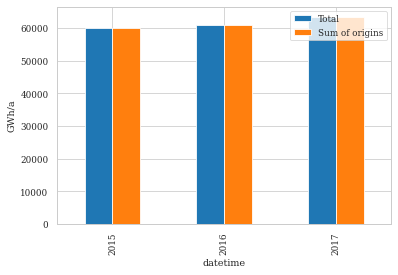

In [29]:
total = em15["total_consumption_avg"].groupby(em15.index.year).sum().round(-3)/1000
sum = em15[elmap.pcs].groupby(em15.index.year).sum().sum(axis=1).round(-3)/1000
comparison = pd.DataFrame([total,sum], index=["Total","Sum of origins"]).transpose()
comparison.plot.bar(ylabel="GWh/a")
comparison

Daraus ergeben sich folgende Variablen, für die von 2015 bis 2017 Daten vorliegen:

In [30]:
em15set = set(em15.columns)
common_cols = list(em15set & em18set)
sorted(common_cols)

['carbon_intensity_avg',
 'power_consumption_battery_discharge_avg',
 'power_consumption_biomass_avg',
 'power_consumption_coal_avg',
 'power_consumption_gas_avg',
 'power_consumption_geothermal_avg',
 'power_consumption_hydro_avg',
 'power_consumption_hydro_discharge_avg',
 'power_consumption_nuclear_avg',
 'power_consumption_oil_avg',
 'power_consumption_solar_avg',
 'power_consumption_unknown_avg',
 'power_consumption_wind_avg',
 'total_consumption_avg',
 'total_export_avg',
 'total_import_avg',
 'total_production_avg']

In [31]:
em15[common_cols].shape

(26304, 17)

In [32]:
em18[common_cols].shape

(17505, 17)

In [33]:
em = pd.concat([em15[common_cols], em18[common_cols]])
em.shape

(43809, 17)

,power_consumption_biomass_avg,power_consumption_hydro_avg,power_consumption_solar_avg,power_consumption_wind_avg,power_consumption_geothermal_avg,power_consumption_coal_avg,power_consumption_gas_avg,power_consumption_nuclear_avg,power_consumption_oil_avg,power_consumption_unknown_avg,power_consumption_battery_discharge_avg,power_consumption_hydro_discharge_avg
datetime,,,,,,,,,,,,
2015,3034.0,19956.0,1654.0,5734.0,1.0,10548.0,7214.0,4785.0,61.0,5793.0,0.0,1409.0
2016,3448.0,24781.0,1581.0,5604.0,2.0,8918.0,7171.0,3993.0,47.0,1166.0,0.0,4168.0
2017,3693.0,23754.0,1908.0,7529.0,3.0,8797.0,8441.0,4092.0,55.0,1358.0,0.0,3830.0
2018,3812.0,24594.0,2255.0,7359.0,1.0,8504.0,7575.0,4382.0,17.0,897.0,0.0,4102.0
2019,3201.0,24140.0,1929.0,8334.0,0.0,5871.0,8469.0,3509.0,52.0,484.0,0.0,3531.0


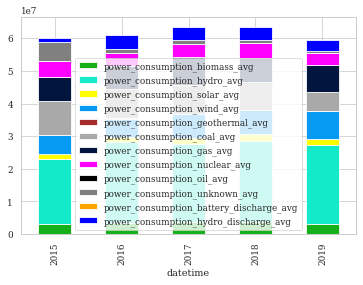

In [34]:
fig, ax = plt.subplots()

em["total_consumption_avg"].groupby(em.index.year).sum().plot(kind="line",ax=ax)
em[elmap.pcs].groupby(em.index.year).sum().plot(kind="bar", color=elmap.carrier_colors.values(), stacked=True, ax=ax)
em[elmap.pcs].groupby(em.index.year).sum().round(-3)/1000

## Save cleaned combined DF

In [36]:
em.to_csv(DATA_INTERIM / "em_common_15-19.csv",
          sep=";",
          decimal=",",
          encoding="cp850")


### Datenlücken

https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

In [64]:

# forward-fill
# data.fillna(method='ffill')

f = em[((em.index >= "2019-04-01") & (em.index <= "2019-06-01"))]
f.isnull().any()

power_consumption_oil_avg                  False
power_consumption_biomass_avg              False
total_import_avg                           False
power_consumption_gas_avg                  False
power_consumption_hydro_avg                False
power_consumption_solar_avg                False
power_consumption_coal_avg                 False
power_consumption_nuclear_avg              False
power_consumption_unknown_avg              False
carbon_intensity_avg                       False
power_consumption_wind_avg                 False
power_consumption_geothermal_avg           False
total_production_avg                       False
total_export_avg                           False
power_consumption_battery_discharge_avg     True
power_consumption_hydro_discharge_avg      False
total_consumption_avg                      False
dtype: bool

In [ ]:

#separate in years

df_dict = elmap.split_into_years(em)



